In [1]:
import cv2
from matplotlib import pyplot as plt 
import numpy as np
import sklearn
import math
global t
global upper
global downer
point = [1,50]
pBar = 70

In [2]:
img = cv2.imread("spiral.jpg",0)
imgg = cv2.imread("spiral.jpg")
gray= cv2.cvtColor(imgg,cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img,(7,7),cv2.BORDER_DEFAULT)

In [3]:
def callTrackbar(*arg):
     cv2.getTrackbarPos("t", "Trackbar")

Get the sobel edge from row and column

In [4]:
def SobelEdge(img):
    y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
    x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    sobel_y = cv2.filter2D(img,cv2.CV_16S,y)
    sobel_x = cv2.filter2D(img,cv2.CV_16S,x)
    
    imgx = sobel_x
    imgy = sobel_y
    
    x = np.size(img,0)
    y = np.size(img, 1)
    sobel = np.zeros((img.shape),np.uint8)
    for i in range(0, x):
        for j in range(0, y):
            sobel[i][j] = abs(sobel_y[i][j])+ abs(sobel_x[i][j])
    #plt.imshow(sobel,cmap='gray')
    return sobel

In [5]:
def threshold_back(img,imgSize,t):
    image = np.zeros((imgSize[0],imgSize[1]),dtype = np.uint8)
    x = np.size(img,0)
    y = np.size(img, 1)
    for i in range(0, x):
        for j in range(0, y):
            for h in range(0,3):
                if img[i,j,h] >= t:
                    image[i,j] = np.uint8(255) 
    return image

In [6]:
def threshold(img):
    t = cv2.getTrackbarPos("t","Trackbar")
    thresholdV = threshold_back(img,img_size,t)
    return thresholdV

threshold is 17


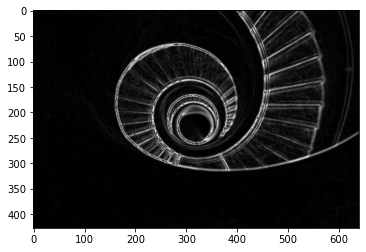

In [7]:
sobel = cv2.imread('spiral.jpg')
img_size = [sobel.shape[0], sobel.shape[1]]
cv2.namedWindow('Trackbar',cv2.WINDOW_AUTOSIZE)
cv2.createTrackbar("t",'Trackbar',1,80,callTrackbar)
while True:
    cv2.imshow('Trackbar',sobel)
    key = cv2.waitKey(1) 
    if key==27:
        break
    if key ==13:
        sobel = cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)
        sobel = cv2.GaussianBlur(sobel,(7,7),0)
        sobel = SobelEdge(sobel)
        k = threshold(sobel)
intensity=cv2.getTrackbarPos("t","Trackbar")
print("threshold is " + str(intensity))
res = sobel.copy()
plt.imshow(sobel)
cv2.destroyAllWindows()

In [8]:
def Cannycallbackup(*arg):
    Canny_val = cv2.getTrackbarPos("upper", "Trackbar")

In [9]:
def Cannycallbackdown(*arg):
    Canny_val = cv2.getTrackbarPos("down", "Trackbar")

In [10]:
def Canny(img,upper,downer):
    edges = cv2.Canny(img,upper,downer)
    return edges

In [11]:
def canny_threshold(img):
    upper = cv2.getTrackbarPos("upper", "Trackbar")
    downer = cv2.getTrackbarPos("downer", "Trackbar")
    img = Canny(img,upper,downer)
    return img

upper threshold is 51
down threshold is 7


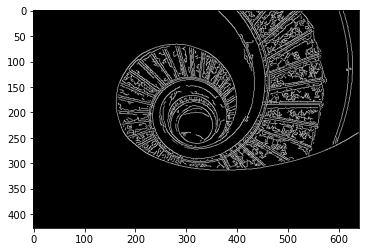

In [12]:
canny_img = cv2.imread('spiral.jpg')
cv2.namedWindow('Trackbar',cv2.WINDOW_AUTOSIZE)
cv2.createTrackbar("upper",'Trackbar',1,80,Cannycallbackup)
cv2.createTrackbar("down",'Trackbar',1,80,Cannycallbackdown)
while True:
    cv2.imshow('Trackbar',canny_img)
    key = cv2.waitKey(1) 
    if key==27:
        break
    if key ==13:
        canny_img = cv2.GaussianBlur(canny_img,(3,3),0)
        canny_img= canny_threshold(canny_img) 
intensity1=cv2.getTrackbarPos("upper","Trackbar")
print("upper threshold is " + str(intensity1))
intensity2=cv2.getTrackbarPos("down","Trackbar")
print("down threshold is " + str(intensity2))
res = canny_img.copy()
plt.imshow(canny_img,cmap = 'gray')
cv2.destroyAllWindows()

In [13]:
def CompareMetricPlt(x, y):
    plt.figure(dpi=200)
    plt.figure(figsize=(5,5))
    
    mX = []
    mY = y
    
    for i in range(x[0],x[1]+1):
        mX.append(i)
    
    plt.plot(mX,mY)
    plt.plot(mX,mY)

    plt.tight_layout()

In [14]:
def Ratio(Range):
    metric = []
    for tvalue in range(Range[0],Range[1]+1):
        p= 0
        k = 0
        persantage = (tvalue - Range[0]) / (Range[1] - Range[0])
        temp = int(round(pBar * persantage))
        image = sobel
        image = threshold_back(image,img_size,tvalue)
        x = np.size(image,0)
        y = np.size(image, 1)
        for i in range(0, x):
            for j in range(0, y):
                if (image[i,j] !=0 and res[i,j] !=0):
                    p = p +1
                if image[i,j] ==0 and res[i,j] ==0:
                    p = p +1 
        ratio = p / (x*y)
        metric.append(ratio)
        
    mX = []
    mY = metric
    
    for i in range(Range[0],Range[1]+1):
        mX.append(i)
    
    plt.plot(mX,mY)
    plt.plot(mX,mY)
    plt.tight_layout()
    return metric

Done


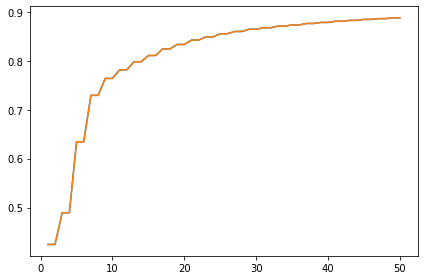

In [15]:
r = Ratio(point)
print("Done")

threshold is 14


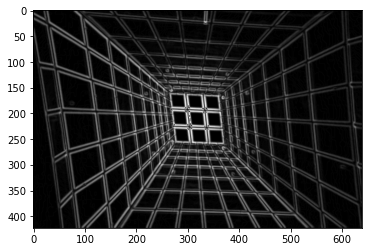

In [16]:
sobel = cv2.imread('lines.jpg')
gray= cv2.cvtColor(sobel,cv2.COLOR_BGR2GRAY)
img_size = [sobel.shape[0], sobel.shape[1]]
cv2.namedWindow('Trackbar',cv2.WINDOW_AUTOSIZE)
cv2.createTrackbar("t",'Trackbar',1,80,callTrackbar)
while True:
    cv2.imshow('Trackbar',sobel)
    key = cv2.waitKey(1) 
    if key==27:
        break
    if key ==13:
        sobel = cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)
        sobel = cv2.GaussianBlur(sobel,(7,7),0)
        sobel = SobelEdge(sobel)
        k = threshold(sobel)
intensity=cv2.getTrackbarPos("t","Trackbar")
print("threshold is " + str(intensity))
res = sobel.copy()
plt.imshow(sobel)
cv2.destroyAllWindows()

upper threshold is 67
down threshold is 17


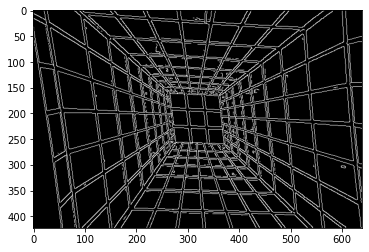

In [17]:
canny_img = cv2.imread('lines.jpg')
cv2.namedWindow('Trackbar',cv2.WINDOW_AUTOSIZE)
cv2.createTrackbar("upper",'Trackbar',1,80,Cannycallbackup)
cv2.createTrackbar("down",'Trackbar',1,80,Cannycallbackdown)
while True:
    cv2.imshow('Trackbar',canny_img)
    key = cv2.waitKey(1) 
    if key==27:
        break
    if key ==13:
        canny_img = cv2.GaussianBlur(canny_img,(3,3),0)
        canny_img= canny_threshold(canny_img) 
intensity1=cv2.getTrackbarPos("upper","Trackbar")
print("upper threshold is " + str(intensity1))
intensity2=cv2.getTrackbarPos("down","Trackbar")
print("down threshold is " + str(intensity2))
res = canny_img.copy()
plt.imshow(canny_img,cmap = 'gray')
cv2.destroyAllWindows()

Done


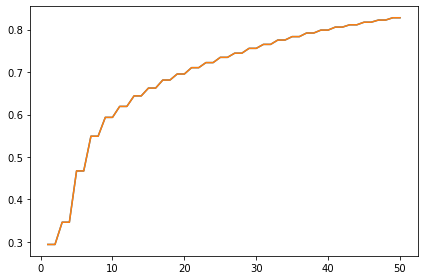

In [18]:
r = Ratio(point)
print("Done")

threshold is 15


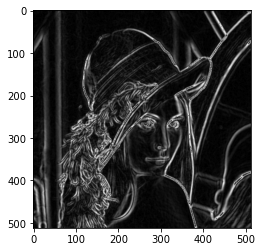

In [19]:
sobel = cv2.imread('lena.jpg')
gray= cv2.cvtColor(sobel,cv2.COLOR_BGR2GRAY)
img_size = [sobel.shape[0], sobel.shape[1]]
cv2.namedWindow('Trackbar',cv2.WINDOW_AUTOSIZE)
cv2.createTrackbar("t",'Trackbar',1,80,callTrackbar)
while True:
    cv2.imshow('Trackbar',sobel)
    key = cv2.waitKey(1) 
    if key==27:
        break
    if key ==13:
        sobel = cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)
        sobel = cv2.GaussianBlur(sobel,(7,7),0)
        sobel = SobelEdge(sobel)
        k = threshold(sobel)
intensity=cv2.getTrackbarPos("t","Trackbar")
print("threshold is " + str(intensity))
res = sobel.copy()
plt.imshow(sobel)
cv2.destroyAllWindows()

upper threshold is 45
down threshold is 15


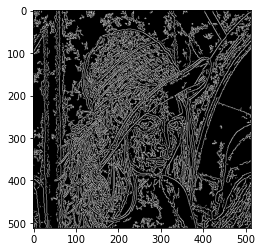

In [20]:
canny_img = cv2.imread('lena.jpg')
cv2.namedWindow('Trackbar',cv2.WINDOW_AUTOSIZE)
cv2.createTrackbar("upper",'Trackbar',1,80,Cannycallbackup)
cv2.createTrackbar("down",'Trackbar',1,80,Cannycallbackdown)
while True:
    cv2.imshow('Trackbar',canny_img)
    key = cv2.waitKey(1) 
    if key==27:
        break
    if key ==13:
        canny_img = cv2.GaussianBlur(canny_img,(3,3),0)
        canny_img= canny_threshold(canny_img) 
intensity1=cv2.getTrackbarPos("upper","Trackbar")
print("upper threshold is " + str(intensity1))
intensity2=cv2.getTrackbarPos("down","Trackbar")
print("down threshold is " + str(intensity2))
res = canny_img.copy()
plt.imshow(canny_img,cmap = 'gray')
cv2.destroyAllWindows()

Done


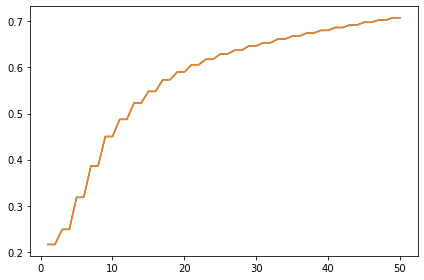

In [21]:
r = Ratio(point)
print("Done")